# Notebook activity 5.9 Fitting a multiple regression model with more explanatory variables


In Notebook activity 5.8 we used data from `olympic` to find a parsimonious model for the response `medals` based on the variables `lagMedals`, `population`, `gdp`, `logPopulation` and `logGdp`.

In this notebook activity, we will again seek a parsimonious model for the response `medals`. However, this time we will considering including the variables `host`, `nextHost` and `year` as well. 

## (a) Getting started

### (i)

Start by running the following code.

In [ ]:
# Load the M348 package
library(M348)
# Load the olympic data frame
data(olympic)
# Check the data frame has loaded OK
head(olympic)
#Creating the new variables
logPopulation <- log(olympic$population)
logGdp <- log(olympic$gdp)


## (b) Fitting the full model

### (i)

Use the empty code cell below to fit the full model, storing the results in an object called `medalsFullModel`. Display a summary for the results from fiting this model.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [2]:
medalsFullModel <- lm(medals ~ lagMedals + population + gdp + logPopulation 
                        + logGdp + host + nextHost + year, data = olympic)
summary(medalsFullModel)


Call:
lm(formula = medals ~ lagMedals + population + gdp + logPopulation + 
    logGdp + host + nextHost + year, data = olympic)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.9484  -0.5646  -0.0835   0.3376  29.1619 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   27.3615418 28.6230192   0.956  0.33933    
lagMedals      0.9318445  0.0090753 102.679  < 2e-16 ***
population     0.0015972  0.0008645   1.848  0.06494 .  
gdp            0.0038002  0.0073374   0.518  0.60463    
logPopulation  0.1498995  0.0538093   2.786  0.00544 ** 
logGdp         0.1610786  0.1046385   1.539  0.12401    
host          12.8252200  1.3109562   9.783  < 2e-16 ***
nextHost       8.6003062  1.2876444   6.679 3.87e-11 ***
year          -0.0137590  0.0142696  -0.964  0.33516    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.091 on 1060 degrees of freedom
Multiple R-squared:  0.9476,	Adjusted R-squared:  0.947

### (ii)

From the summary you produced in part (b)(i), does it appear that there might be a more parsimonious model than the full model? Why or why not?

#### Solution <a class="tocSkip">

It appears that there is a more parsimonious model can be found than the full model. Some of the variables, notably `gdp` and `year`, are not significant in the model.

## (c) Fitting the null model

### (i)

Use the empty code below to fit the null model for the response variable `medals`, storing the results in an object called `medalsNullModel`. Display a summary of the results from fitting the model.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [3]:
medalsNullModel <- lm(medals ~ 1, data = olympic)
summary(medalsNullModel)


Call:
lm(formula = medals ~ 1, data = olympic)

Residuals:
    Min      1Q  Median      3Q     Max 
 -4.992  -4.992  -4.992  -0.992 116.008 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.9916     0.4114   12.13   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.45 on 1068 degrees of freedom


## (d) Using stepwise regression

### (i)

Use the empty cell below to run both forward and backward stepwise regression, starting from the full model to find a parsimonious model that includes some, or all, of the variables: `lagMedals`, `population`, `gpd`, `logPopulation`, `logGdp`, `host`, `nextHost` and `year`. (Look back at Notebook activity 2.7 if you need a reminder of how to do this.)

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [4]:
step(medalsFullModel, direction = "both", 
     scope = list(lower = medalsNullModel, upper = medalsFullModel))

Start:  AIC=2421.87
medals ~ lagMedals + population + gdp + logPopulation + logGdp + 
    host + nextHost + year

                Df Sum of Sq    RSS    AIC
- gdp            1         3  10132 2420.1
- year           1         9  10138 2420.8
<none>                        10129 2421.9
- logGdp         1        23  10152 2422.3
- population     1        33  10162 2423.3
- logPopulation  1        74  10203 2427.7
- nextHost       1       426  10556 2463.9
- host           1       915  11044 2512.3
- lagMedals      1    100749 110878 4978.0

Step:  AIC=2420.14
medals ~ lagMedals + population + logPopulation + logGdp + host + 
    nextHost + year

                Df Sum of Sq    RSS    AIC
- year           1         9  10141 2419.1
<none>                        10132 2420.1
- population     1        33  10165 2421.6
+ gdp            1         3  10129 2421.9
- logPopulation  1        73  10205 2425.8
- logGdp         1        79  10211 2426.4
- nextHost       1       426  10558 2462.1
- ho


Call:
lm(formula = medals ~ lagMedals + population + logPopulation + 
    logGdp + host + nextHost, data = olympic)

Coefficients:
  (Intercept)      lagMedals     population  logPopulation         logGdp  
    -0.246313       0.932037       0.001587       0.148514       0.194354  
         host       nextHost  
    12.832789       8.612879  


### (ii)

Which variables are included in the final model found in part (i)?

#### Solution <a class="tocSkip">

In the final model, the following variables are included:

`lagMedals`, `host`, `nextHost`, `logPopulation`, `logGDP` and `population`.

### (iii)

Use the empty cell below to run both forward and backward stepwise regression, starting from the *null* model. 

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [5]:
step(medalsNullModel, direction = "both", 
     scope = list(lower =medalsNullModel, upper = medalsFullModel))

Start:  AIC=5557.98
medals ~ 1

                Df Sum of Sq    RSS    AIC
+ lagMedals      1    181585  11683 2560.5
+ population     1     35461 157808 5343.3
+ logPopulation  1     31805 161464 5367.8
+ host           1     18148 175121 5454.6
+ logGdp         1     14432 178837 5477.0
+ gdp            1      7849 185420 5515.7
+ nextHost       1      6442 186827 5523.7
<none>                       193269 5558.0
+ year           1         0 193269 5560.0

Step:  AIC=2560.46
medals ~ lagMedals

                Df Sum of Sq    RSS    AIC
+ host           1       894  10789 2477.3
+ nextHost       1       433  11251 2522.1
+ population     1       122  11562 2551.2
+ logPopulation  1        82  11601 2554.9
+ logGdp         1        25  11659 2560.2
<none>                        11683 2560.5
+ gdp            1        20  11663 2560.6
+ year           1         8  11676 2561.8
- lagMedals      1    181585 193269 5558.0

Step:  AIC=2477.33
medals ~ lagMedals + host

                Df Su


Call:
lm(formula = medals ~ lagMedals + host + nextHost + logPopulation + 
    logGdp + population, data = olympic)

Coefficients:
  (Intercept)      lagMedals           host       nextHost  logPopulation  
    -0.246313       0.932037      12.832789       8.612879       0.148514  
       logGdp     population  
     0.194354       0.001587  


### (iv)

Is the final model from part (iii) the same as the final model found in part (i)? If not, in what way do the two models differ, and which one do you feel is the better model? Hence what should be regarded as the parsimonious model?

#### Solution <a class="tocSkip">

Working from the null model results in the *same* final model as we obtained when we worked from the full model. So our parsimonious model is: 

`medals ~ lagMedals + host + nextHost + logPopulation + logGDP + population`.

## (e) Exploring the parsimonious model

### (i)

In the empty code cell below, fit the (best) parsimonious model from part (d)(iv), storing the results in an object called `medalsMLRfit`. Obtain a summary of the results from fitting the model.

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

In [6]:
medalsMLRFit <- lm(medals ~ lagMedals + host+ nextHost + population + 
                   logGdp + logPopulation, data = olympic)
summary(medalsMLRFit)


Call:
lm(formula = medals ~ lagMedals + host + nextHost + population + 
    logGdp + logPopulation, data = olympic)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.0166  -0.5198  -0.0981   0.3078  29.2117 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.2463129  0.1704148  -1.445  0.14865    
lagMedals      0.9320374  0.0090688 102.774  < 2e-16 ***
host          12.8327892  1.3103221   9.794  < 2e-16 ***
nextHost       8.6128795  1.2870078   6.692 3.55e-11 ***
population     0.0015874  0.0008636   1.838  0.06631 .  
logGdp         0.1943544  0.0697709   2.786  0.00544 ** 
logPopulation  0.1485136  0.0537330   2.764  0.00581 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.09 on 1062 degrees of freedom
Multiple R-squared:  0.9475,	Adjusted R-squared:  0.9472 
F-statistic:  3196 on 6 and 1062 DF,  p-value: < 2.2e-16


### (ii)

Based on the results from part (i), what is associated with a country doing well at the Olympics? 

#### Solution <a class="tocSkip">

Notice that all of the coefficients are positive. This suggests that each of these explanatory variables has a positive association with the number of medals won.

Being the host appears to increase the number of medals by approximately 13, and being the next host by approximately 9.

The model also suggests that for every medal a country won last time, they are expected to win 0.9 medals this time. 

Richer countries, and those with large populations, also tend to win more medals. 

### (iii)

Use the code cell below to produce the diagnostic plots for the parsimonious model you fitted in part (i). 

#### Solution <a class="tocSkip">

The required code and resulting output are given below.

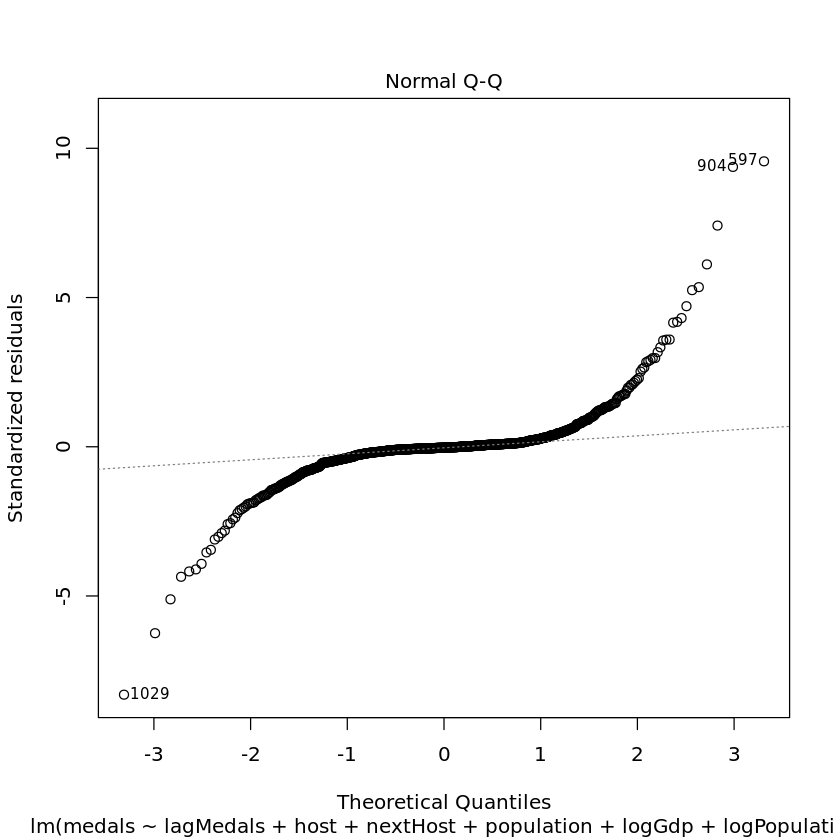

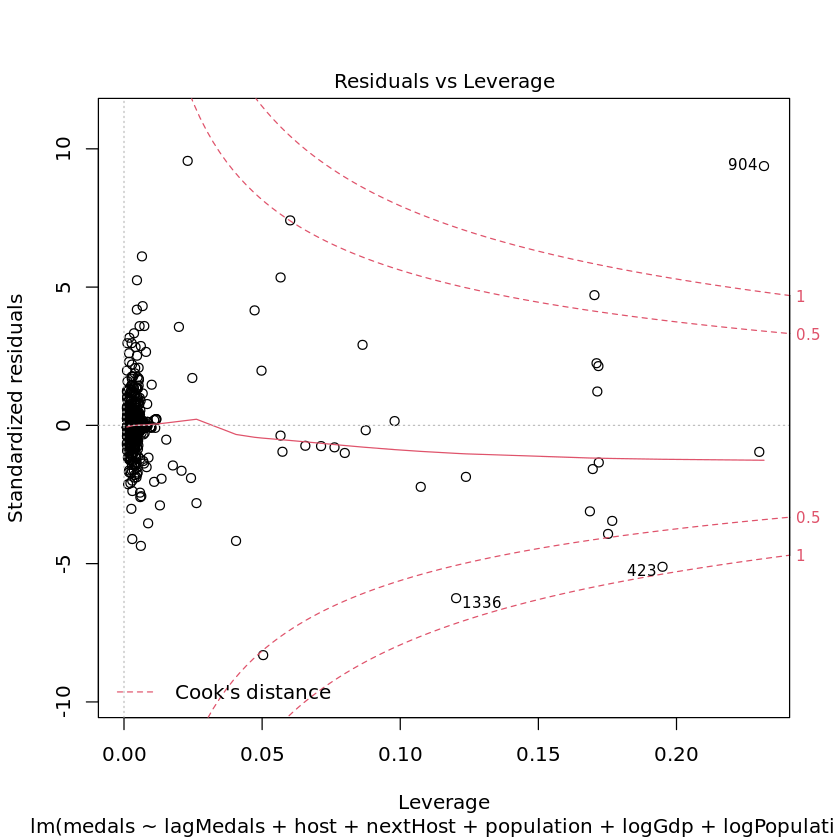

In [7]:
plot(medalsMLRFit)

### (iv)

Based on the plots you obtained in part (e) (iii), does the parsimous model you used in part (e)(i) fit the data well? Why or why not?

#### Solution <a class="tocSkip">

The diagnostic plots raise a few issues of concern. 

Perhaps the most striking is that the normal probability plot does not look at all straight. The normality assumption is therefore dubious. 

Furthermore, the scale-location plot suggests that the variance is increasing. However, in the residuals versus fitted plot and the residuals versus leverage plot, it is noticeable that most of the points are bunched together at the left hand end. This corresponds to countries that win few, if any, medals. In general, such bunching of points raises questions about whether there are overly influential points. The residuals versus leverage plot confirms that this is a concern, since there are some points which appear to be influential with a Cook statistic greater than 0.5.